# Brief Overview
Actually, this is my projects for Quantitative Methods course on my 4th semester. Actually is just doing classification whether is it raining or not based on data from Australia Meteorology Bureau.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df = pd.read_csv('weatherAUS.csv')
# df = df.drop('RISK_MM', axis=1)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [19]:
cols = list(df.columns)
for c in cols:
    if str(df[c].dtypes) == 'float64':
        median = df[c].median()
        df[c].fillna(median, inplace=True)
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

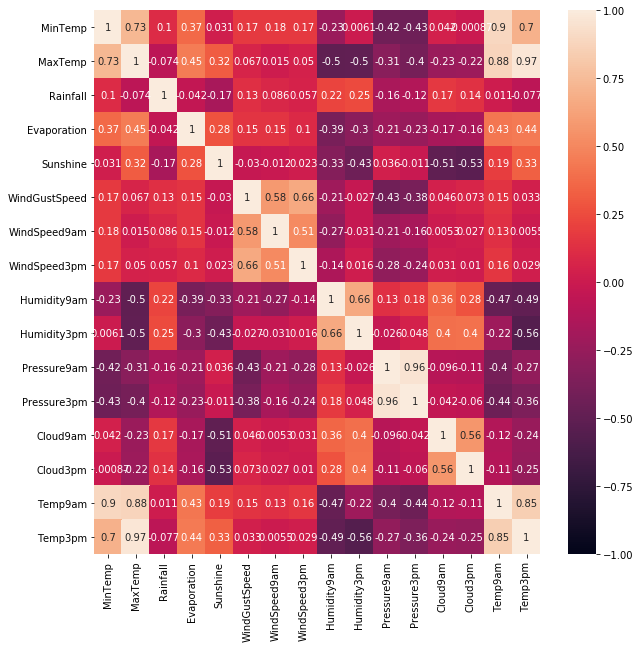

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True) 
plt.show()

Berdasarkan heatmap di atas, data yang perlu dibuang diantaranya adalah temp9am, cloud9am, minTemp, dan pressure9am. Selain itu, Karena ini tidak menggangap posisi dan waktu, maka 2 kolom tersebut dihilangkan.

In [29]:
df = df.drop(['Temp9am', 'Pressure9am', 'Cloud9am', 'MinTemp', 'Date', 'Location', 'WindDir9am', 'WindSpeed9am', 'Humidity9am', 'WindGustDir', 'WindGustSpeed'], axis=1)
df.shape

(142193, 19)

In [35]:
df.head()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,22.9,0.6,4.8,8.5,W,44.0,WNW,24.0,22.0,1007.1,5.0,21.8,No,No
1,25.1,0.0,4.8,8.5,WNW,44.0,WSW,22.0,25.0,1007.8,5.0,24.3,No,No
2,25.7,0.0,4.8,8.5,WSW,46.0,WSW,26.0,30.0,1008.7,2.0,23.2,No,No
3,28.0,0.0,4.8,8.5,NE,24.0,E,9.0,16.0,1012.8,5.0,26.5,No,No
4,32.3,1.0,4.8,8.5,W,41.0,NW,20.0,33.0,1006.0,8.0,29.7,No,No


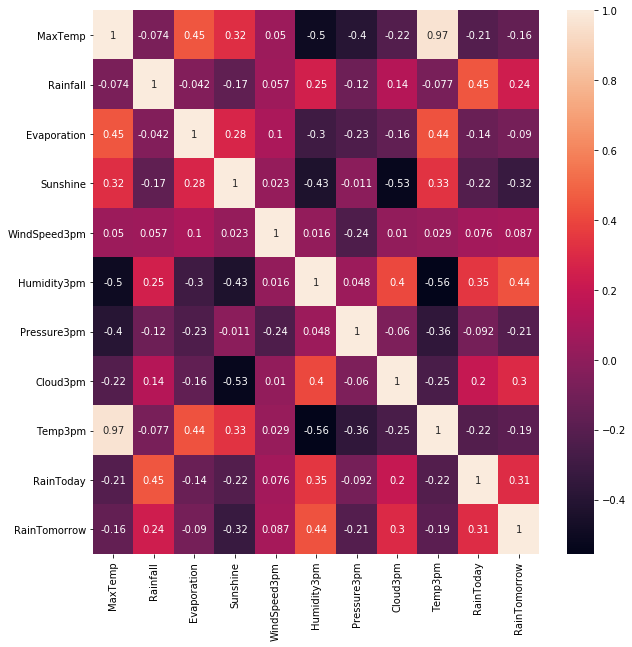

In [87]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
df['RainToday'] = le.fit_transform(list(df['RainToday']))
df['RainTomorrow'] = le.fit_transform(list(df['RainTomorrow']))

,MaxTemp,Rainfall,Evaporation,Sunshine,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,22.9,0.6,4.8,8.5,WNW,24.0,22.0,1007.1,5.0,21.8,0,0
1,25.1,0.0,4.8,8.5,WSW,22.0,25.0,1007.8,5.0,24.3,0,0
2,25.7,0.0,4.8,8.5,WSW,26.0,30.0,1008.7,2.0,23.2,0,0
3,28.0,0.0,4.8,8.5,E,9.0,16.0,1012.8,5.0,26.5,0,0
4,32.3,1.0,4.8,8.5,NW,20.0,33.0,1006.0,8.0,29.7,0,0


In [51]:
df_processed = pd.get_dummies(df, drop_first=True)
df_processed.head()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,22.9,0.6,4.8,8.5,24.0,22.0,1007.1,5.0,21.8,0,...,0,0,0,0,0,0,0,0,1,0
1,25.1,0.0,4.8,8.5,22.0,25.0,1007.8,5.0,24.3,0,...,0,0,0,0,0,0,0,0,0,1
2,25.7,0.0,4.8,8.5,26.0,30.0,1008.7,2.0,23.2,0,...,0,0,0,0,0,0,0,0,0,1
3,28.0,0.0,4.8,8.5,9.0,16.0,1012.8,5.0,26.5,0,...,0,0,0,0,0,0,0,0,0,0
4,32.3,1.0,4.8,8.5,20.0,33.0,1006.0,8.0,29.7,0,...,0,1,0,0,0,0,0,0,0,0


# Modelling Section
Pada tahapan ini, akan dilakukan pemodelan menggunakan Decision Tree dan Logistic Regression. Sebelum melakukan pemodelan, pastikan:<br>

1. Data sudah dalam bentuk numerik
2. Data tidak ada missing value

In [58]:
X = df_processed.drop('RainTomorrow', axis=1).values
y = df_processed['RainTomorrow'].values

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

In [68]:
print(cross_val_score(lr, X_train, y_train, cv=5))
print(cross_val_score(dt, X_train, y_train, cv=5))

[0.83267405 0.83201477 0.83164835 0.83626374 0.83635165]
[0.7772064  0.78045886 0.77876923 0.7789011  0.77714286]


In [82]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict_proba(X_test)[:, 1]
lr.score(X_test, y_test)

0.8348394809944091

In [83]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18946  3118]
 [ 2991  3384]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22064
           1       0.52      0.53      0.53      6375

    accuracy                           0.79     28439
   macro avg       0.69      0.69      0.69     28439
weighted avg       0.79      0.79      0.79     28439



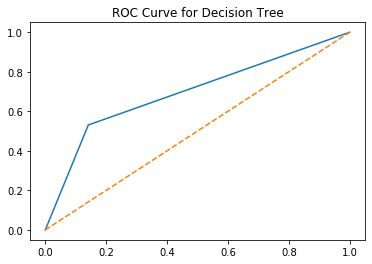

In [86]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(np.linspace(0, 1), np.linspace(0, 1), linestyle='--', label='Line')
plt.title('ROC Curve for Decision Tree')
plt.show()

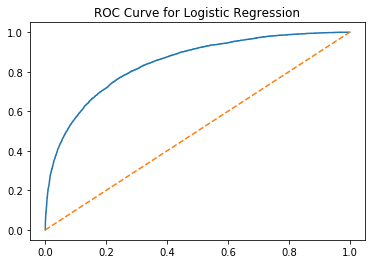

In [85]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(np.linspace(0, 1), np.linspace(0, 1), linestyle='--', label='Line')
plt.title('ROC Curve for Logistic Regression')
plt.show()